In [67]:
import pandas as pd

from sklearn import linear_model
import  matplotlib.pyplot as plt

In [68]:
df = pd.read_csv("renta_per_capita.csv", encoding="UTF-8")
print(df)

    year         renta
0   1970   3399.299037
1   1971   3768.297935
2   1972   4251.175484
3   1973   4804.463248
4   1974   5576.514583
5   1975   5998.144346
6   1976   7062.131392
7   1977   7100.126170
8   1978   7247.967035
9   1979   7602.912681
10  1980   8355.968120
11  1981   9434.390652
12  1982   9619.438377
13  1983  10416.536590
14  1984  10790.328720
15  1985  11018.955850
16  1986  11482.891530
17  1987  12974.806620
18  1988  15080.283450
19  1989  16426.725480
20  1990  16838.673200
21  1991  17266.097690
22  1992  16412.083090
23  1993  15875.586730
24  1994  15755.820270
25  1995  16369.317250
26  1996  16699.826680
27  1997  17310.757750
28  1998  16622.671870
29  1999  17581.024140
30  2000  18987.382410
31  2001  18601.397240
32  2002  19232.175560
33  2003  22739.426280
34  2004  25719.147150
35  2005  29198.055690
36  2006  32738.262900
37  2007  36144.481220
38  2008  37446.486090
39  2009  32755.176820
40  2010  38420.522890
41  2011  42334.711210
42  2012  4

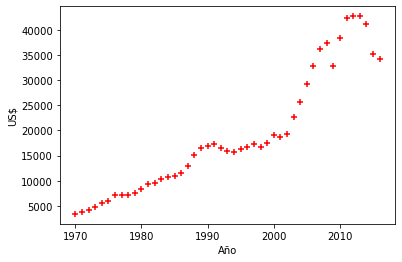

In [69]:
%matplotlib inline
plt.xlabel("Año")
plt.ylabel("US$")
plt.scatter(df.year, df.renta, color="red", marker="+")
plt.show()

In [70]:
reg = linear_model.LinearRegression()
reg.fit(df[["year"]], df.renta)

LinearRegression()

In [71]:
df["prediccion"] = reg.predict(df[["year"]])

In [72]:
df2 = pd.DataFrame({"year": [2017,2018,2019,2020, 2021, 2022]})
print(df2)

   year
0  2017
1  2018
2  2019
3  2020
4  2021
5  2022


In [73]:
from datetime import datetime
primer_anyo = df.year.tail(1).values[0] + 1
print(primer_anyo)
anyo_actual = anyo_actual = datetime.now().year
print(anyo_actual)
anyo_extras = 2

2017
2022


In [74]:
anyos_a_predecir = pd.DataFrame({"year": range(primer_anyo, anyo_actual + anyo_extras)})
print(anyos_a_predecir)

   year
0  2017
1  2018
2  2019
3  2020
4  2021
5  2022
6  2023


In [75]:
# predecimos la renta para los años que hemos creado
p = reg.predict(anyos_a_predecir)

p

array([38803.29886875, 39631.76394397, 40460.22901919, 41288.69409442,
       42117.15916964, 42945.62424486, 43774.08932009])

In [78]:
anyos_a_predecir["renta"]= p
anyos_a_predecir

,year,renta
0,2017,38803.298869
1,2018,39631.763944
2,2019,40460.229019
3,2020,41288.694094
4,2021,42117.159170
5,2022,42945.624245
6,2023,43774.089320


In [82]:
df3 = pd.concat([df,anyos_a_predecir])

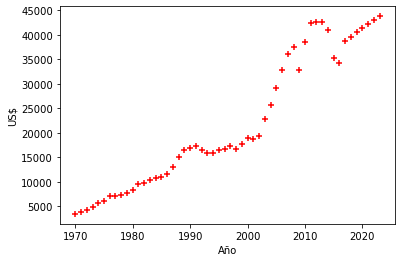

In [84]:
plt.xlabel("Año")
plt.ylabel("US$")
plt.scatter(df3.year, df3.renta, color="red", marker="+")
